In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

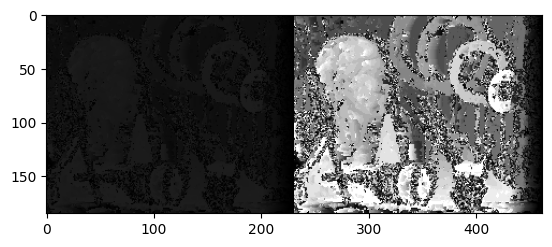

(<matplotlib.image.AxesImage at 0x17801042d00>, None)

In [5]:
dmax=30   #搜寻匹配的范围
window_size=2  #匹配窗大小
f=30 #焦距
T=20 #两个相机间距
alpha=1 #阈值ve的系数


left=cv2.imread('view1m.png')
right=cv2.imread('view5m.png')
#print(left.shape,right.shape)
size1,size2=left.shape[0],left.shape[1]
#####################################################################得到e_avg和最基本的视差图
disparity=np.zeros((size1,size2), dtype=np.uint8)
#error_energy
e=np.zeros_like(disparity)
e_avg=np.ones_like(disparity)
e_avg=e_avg*100000

for d in range(dmax):
    ##先计算  e （i,j，d）
    for i in range(size1):
        for j in range(size2):
            sum =0
            for m in range(window_size):
                for n in range(window_size):
                    for k in range(3):
                        x=min(size1-1,i+m)
                        y=min(size2-1,j+n)
                        square_diff=(int(left[x][min(y+d,size2-1)][k])-int(right[x][y][k]))**2
                        sum=sum+square_diff
            e[i][j]=sum/(3*window_size*window_size)

    ##再计算e_avg（i,j，d）
    for i in range(size1):
        for j in range(size2):
            e_temp = 0
            for m in range(window_size):
                for n in range(window_size):
                    x = min(size1-1, i + m)
                    y = min(size2-1, j + n)
                    e_temp=e_temp+e[x][y]
            e_temp=e_temp/(window_size*window_size)
            if e_temp<e_avg[i,j]:
                e_avg[i,j]=e_temp
                disparity[i,j]=d

cv2.imwrite('disparity_base.png', disparity)
# plt.imshow(disparity)
# plt.show()
#######增强对比度显示
temp=cv2.imread('disparity_base.png')
gray = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY) #opencv的直方图均衡化要基于单通道灰度图像
dst = cv2.equalizeHist(gray)
cv2.imwrite('disparity_base_enhanced.png', dst)
temp2=cv2.imread('disparity_base_enhanced.png')
result1 = np.hstack([temp,temp2])
result1 = cv2.cvtColor(result1,cv2.COLOR_BGR2RGB)
plt.imshow(result1),plt.show()